# LonBoard Example Notebook

[Lonboard](https://developmentseed.org/lonboard/latest/) is an exceptionally fast map data visualization tool that can interface very well with Overture's GeoParquet. 

In [1]:
# Import OvertureMaps-Py
import overturemaps

# Note: You must install and activate "anywidget" for this to work from the extensions on the left-hand pane.
from lonboard import Map, PathLayer, PolygonLayer

In [2]:
# Define a bounding box
# https://boundingbox.klokantech.com/ is a useful tool:
bbox = -112.101392,40.699926,-111.740485,40.853391 # Salt Lake City

In [3]:
roads = overturemaps.record_batch_reader("segment", bbox).read_all()
buildings = overturemaps.record_batch_reader("building", bbox).read_all()

In [ ]:
# Visualize roads with Lonboard:
layer = PathLayer(
    table=roads.select(["id", "geometry", "subtype", "class", "names"]),
    get_color=[200, 0, 200],
    width_min_pixels=0.4,
)
m = Map(layer)
m._height = 500
m

In [8]:
# Visualize buildings with Lonboard:
layer = PolygonLayer(
    table=buildings.select(["id", "geometry", "subtype", "class"]),
    get_fill_color=[200, 0, 200],
)
m2 = Map(layer, view_state={
        "longitude":(bbox[0]+bbox[2])/2,
        "latitude":(bbox[1]+bbox[3])/2,
        "zoom":11})
m2._height = 600
m2

Map(custom_attribution='', layers=(PolygonLayer(get_fill_color=[200, 0, 200], table=arro3.core.Table
---------…

Try it now with 3d buildings: https://developmentseed.org/lonboard/latest/examples/overture-maps/

# GeoDataFrames with GeoPandas
We can also use GeoDataFrames 

In [4]:
# Create Roads GeoDataFrame
roads_df = roads.combine_chunks().to_pandas()
roads_gdf = gpd.GeoDataFrame(
    roads_df,
    geometry=roads_df['geometry'].apply(wkb.loads),
    crs="EPSG:4326"
)
print(f"roads_gdf has {len(roads_gdf):,} features.")

roads_gdf has 50,508 features.


<Axes: >

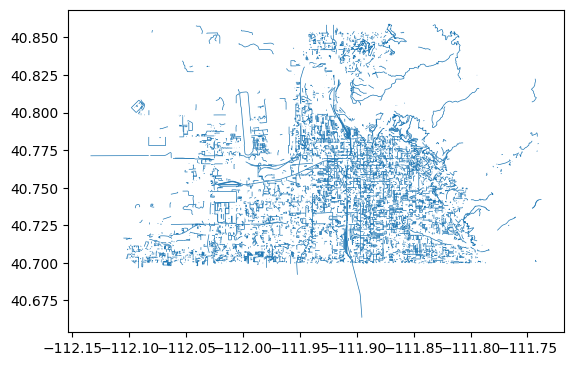

In [5]:
roads_gdf.sample(10000).plot(lw=0.5)

In [6]:
# Create Buildings GeoDataFrame
buildings_df = buildings.combine_chunks().to_pandas()
buildings_gdf = gpd.GeoDataFrame(
    buildings_df,
    geometry=buildings_df['geometry'].apply(wkb.loads),
    crs="EPSG:4326"
)
print(f"buildings_gdf has {len(buildings_gdf):,} features.")

buildings_gdf has 117,701 features.


<Axes: >

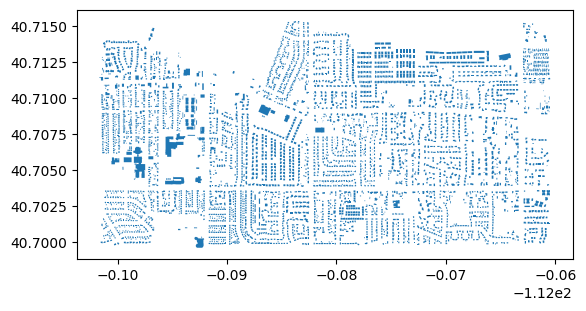

In [7]:
buildings_gdf.head(5000).plot()

In [8]:
layer = PolygonLayer.from_geopandas(
    gdf = buildings_gdf[['id', 'geometry', 'names']].reset_index(drop=True),
    get_fill_color=[93, 103, 157],
    get_line_color=[0, 128, 128],
)

# view_state = {
#     "longitude": 9.18831,
#     "latitude": 45.464336,
#     "zoom": 13,
#     "pitch": 45,
# }
m = Map(layer)
m

Map(custom_attribution='', layers=(PolygonLayer(get_fill_color=[93, 103, 157], get_line_color=[0, 128, 128], t…